In [191]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.stats import norm

In [192]:
sns.set_style('darkgrid')
sns.set_palette("Blues_r")
sns.set_context(rc={"axes.facecolor": ".9", "axes.titlesize":16,"axes.labelsize":15,})

In [193]:

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

## Normal Approximation in Regression

Regression requires that the scatter is football-shapedd. Then one may use normal approximation for the $y$-values conditional on $x$. That is, the observations whose first coordinate is near that $x$ have $y$-values that approximately follow the normal curve.



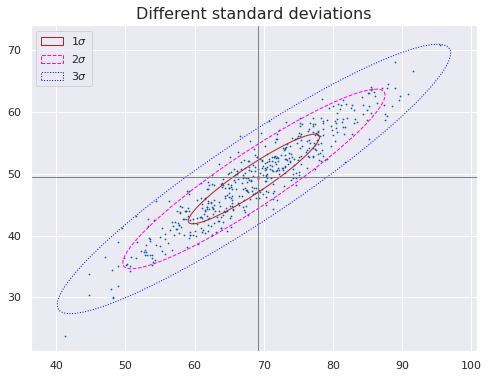

In [194]:

fig, ax_nstd = plt.subplots(figsize=(8, 6))

dependency_nstd = np.array([
    [0.8, 0.8],
    [0.8, 0.35]
])
mu = 69.1, 49.5
scale = 8, 8

ax_nstd.axvline(69.1, c='grey', lw=1)
ax_nstd.axhline(49.5, c='grey', lw=1)

ax_nstd.annotate(r"$\overline{ midterm } = 49.5 $", xy=(8, 50))
ax_nstd.annotate(r"$\overline{ final } = 69.1$", xy=(70, 20))

x, y = get_correlated_dataset(500, dependency_nstd, mu, scale)
ax_nstd.scatter(x, y, s=0.5)

confidence_ellipse(x, y, ax_nstd, n_std=1,
    label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
    label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
    label=r'$3\sigma$', edgecolor='blue', linestyle=':')

ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()

To standardize, subtract off the predicted value $\hat{y}$, then divide by $\sqrt{1-r²}\times{s_y}$.

Among the **students** who scored round 41 on the midterm, what percentage scored above 60 on the final?

We already predict that is $62.5$ on final.

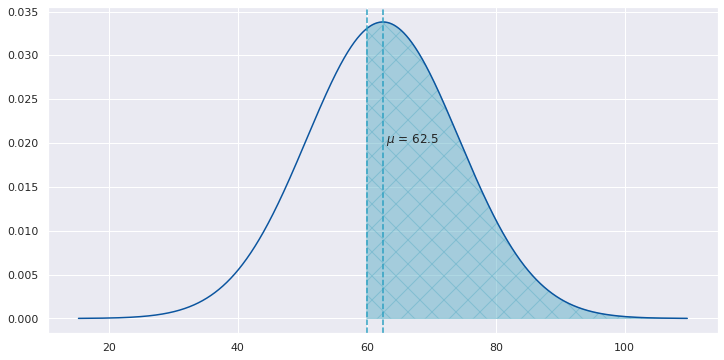

In [195]:

mu = 62.5
sigma = 11.8

# Create the curve from -4σ to 4σ
x = np.arange(mu - 4*sigma, mu + 4*sigma, 0.01)
y = norm.pdf(x, mu, sigma)

ax = sns.lineplot(x=x, y=y)
kde_x, kde_y = ax.lines[0].get_data()

# The number os standard deviations to plot
a_1 = (60)

ax.axvline(mu, color = '#2da1c2', linestyle="--")
ax.annotate(f'$\mu$ = {mu}', xy=(63, 0.02))
ax.axvline(60, color = '#2da1c2', linestyle="--")

_ = ax.fill_between(kde_x, kde_y, 
where=(kde_x > a_1)  , 
interpolate=True, color='#5fb0c7',hatch= 'x', alpha=0.50)

$z = \frac{60-62.5}{\sqrt{(1-0.67)^2}\times{11.8}} = -0.29$

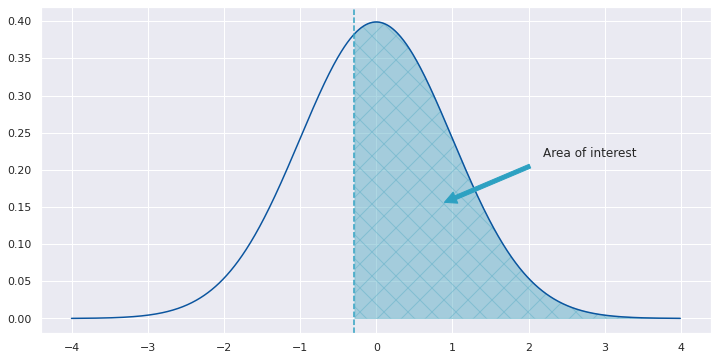

In [196]:

fig, ax = plt.subplots()

mu = 0
variance = 1
sigma = math.sqrt(variance)

x = np.arange(mu - 4*sigma, mu + 4*sigma, 0.01)
y = norm.pdf(x, mu, sigma)

ax.plot(x, y)
kde_x, kde_y = ax.lines[0].get_data()

ax.axvline(-0.29, color = '#2da1c2', linestyle="--")


ax.annotate("Area of interest", xy=(0.75, 0.15),  xycoords='data',
            xytext=(0.82, 0.55), textcoords='axes fraction',
            arrowprops=dict(shrink=0.1, color='#2da1c2'),
            horizontalalignment='center', verticalalignment='center',
            )

_ = ax.fill_between(x, y, where=x>=-0.29, alpha=0.50, color='#5fb0c7',hatch= 'x')

In [197]:
area_within = y[(x>=-0.29)].sum()
area_within

61.214603907702845